In [4]:
import numpy as np
import scipy.linalg as la
import asymmetric as asym
import quantum as qm
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import glob

# Naive

In [5]:
L = 11
# Total time elapsed
end = 20
# Time steps per second
n = 3

weightfore9, weightback9 = asym.get_all_weights(L, end, n, here=False, dense = True)

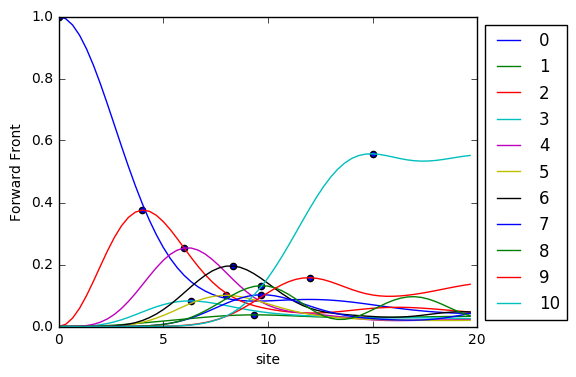

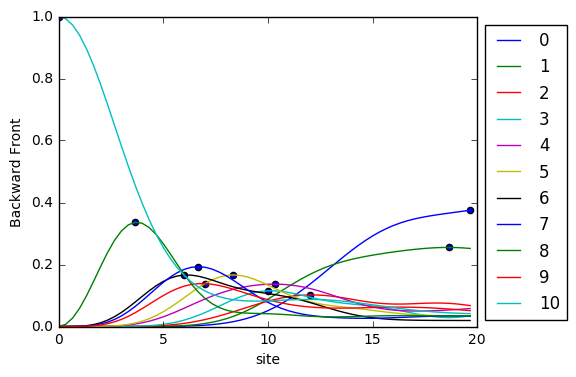

In [12]:
stop = (int) (n*end)
peaks = np.zeros((2,L))

ax = plt.subplot(111)
for i in range(L):
    data = weightfore9[i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[0,i] = jdx; break
        if (jdx == 58): peaks[0,i] = 59; break
    peaks[0,0]=0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,weightfore9[i,:stop], label = str(i))
        ax.scatter(peaks[0,i]/n, weightfore9[i, (int)(peaks[0,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,1)
plt.xlim(0,end)
plt.ylabel('Forward Front')
plt.xlabel('site')
plt.show()

ax = plt.subplot(111)
for i in range(L):
    data = weightback9[i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[1,i] = jdx; break
        if (jdx == 58): peaks[1,i] = 59; break
    peaks[1,L-1]=0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,weightback9[i,:stop], label = str(i))
        ax.scatter(peaks[1,i]/n, weightback9[i, (int)(peaks[1,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,1)
plt.xlim(0,end)
plt.ylabel('Backward Front')
plt.xlabel('site')
plt.show()

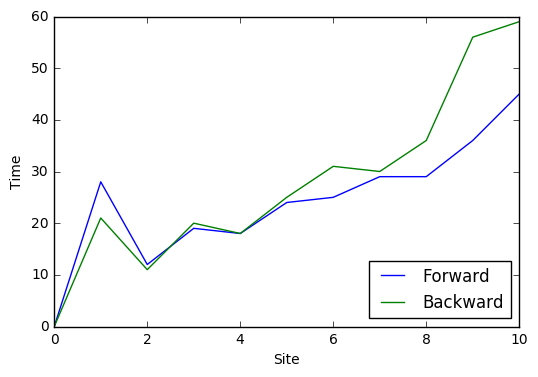

In [13]:
plt.plot(range(L),peaks[0], label="Forward")
plt.plot(range(L),peaks[1][::-1], label="Backward")
plt.ylabel('Time')
plt.xlabel('Site')
plt.legend(loc=4)
plt.savefig('figures/peaks_no_disorder.pdf')
plt.show()

# Averaging
### Without disorder

In [ ]:
stop = (int) (n*end)
peaks = np.zeros((2,L-1))

ax = plt.subplot(111)
for i in range(L-1):
    data = (weightfore9[i]+weightfore9[i+1])/2
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[0,i] = jdx; break
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i))
        ax.scatter(peaks[0,i]/n, data[(int)(peaks[0,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,.5)
plt.xlim(0,3)
plt.show()

ax = plt.subplot(111)
for i in range(L-1):
    data = (weightback9[i]+weightback9[i+1])/2
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): 
            peaks[1,i] = jdx
            break
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i))
        ax.scatter(peaks[1,i]/n, data[(int)(peaks[1,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,.5)
plt.xlim(0,3)
plt.show()

In [ ]:
plt.plot(range(L-1),peaks[0])
plt.plot(range(L-1),peaks[1,::-1])

### With Disorder

In [ ]:
L = 9; end = 20; n = 3

weightfore9, weightback9 = asym.get_all_weights(L, end, n, here=False, dense = True, field_strength=1)

In [ ]:
stop = (int) (n*end)
peaks = np.zeros((2,L-1))

ax = plt.subplot(111)
for i in range(L-1):
    data = (weightfore9[i]+weightfore9[i+1])/2
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[0,i] = jdx; break
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i))
        ax.scatter(peaks[0,i]/n, data[(int)(peaks[0,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,.5)
plt.xlim(0,3)
plt.show()

ax = plt.subplot(111)
for i in range(L-1):
    data = (weightback9[i]+weightback9[i+1])/2
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): 
            peaks[1,i] = jdx
            break
        if (jdx == 58): peaks[1,i] = 59; break
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i))
        ax.scatter(peaks[1,i]/n, data[(int)(peaks[1,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,.5)
plt.xlim(0,3)
plt.show()

In [ ]:
plt.plot(range(L-1),peaks[0])
plt.plot(range(L-1),peaks[1,::-1])

# $A_0+A_1$

In [ ]:
L = 9
# Total time elapsed
end = 20
# Time steps per second
n = 3

weightfore9, weightback9 = asym.get_all_weights(L, end, n, here=False, dense = True, Azero=False, Aplus=True, 
                                                field_strength=0)

In [ ]:
stop = (int) (n*end)
peaks = np.zeros((2,L))

ax = plt.subplot(111)
for i in range(L):
    for jdx, val in enumerate(weightfore9[i]):
        if (val > weightfore9[i,jdx+1] or jdx==58): peaks[0,i] = jdx; break
    peaks[0,0]=0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,weightfore9[i,:stop], label = str(i))
        ax.scatter(peaks[0,i]/n, weightfore9[i, (int)(peaks[0,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,3)
plt.ylabel('Forward OTOC')
plt.xlabel('site')
plt.title('With Disorder')
plt.savefig('figures/plusOTOCwDisorder_fore.pdf')
plt.show()

ax = plt.subplot(111)
for i in range(L):
    for jdx, val in enumerate(weightback9[i]):
        if (val > weightback9[i,jdx+1] or jdx==58): 
            peaks[1,i] = jdx
            break
    peaks[1,L-1]=0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,weightback9[i,:stop], label = str(i))
        ax.scatter(peaks[1,i]/n, weightback9[i, (int)(peaks[1,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,3)
plt.ylabel('Backward OTOC')
plt.xlabel('site')
plt.title('With Disorder')
plt.savefig('figures/plusOTOCwDisorder_back.pdf')
plt.show()

In [ ]:
plt.plot(range(L),peaks[0], label="Forward")
plt.plot(range(L),peaks[1][::-1], label="Backward")
plt.ylabel('Time')
plt.xlabel('Site')
plt.legend(loc=4)
plt.savefig('figures/plusPeakssDisorder')
plt.show()

# Read from file
### L=9

In [117]:
L = 9
end = 3
n = 20

here = True
pauli = True
Azero = True
Aplus = False
Amult = False
field_strength = 1
dot_strength = 0

prefix = "data/weights_L"+str(L)+"end"+str(end)+"n"+str(n)+"_"+str(int(here))+ \
         str(int(pauli))+"_"+str(int(Azero))+str(int(Aplus))+str(int(Amult))+ \
         "_f"+str(field_strength)+"d"+str(dot_strength)+"#"
fnames = glob.glob(prefix + "*.npy")

In [130]:
trials = len(fnames)
weights = np.zeros((trials, 2, L-1, end*n))
peakses = np.zeros((trials, 2, L-1))


for idx, fname in enumerate(fnames):
    _, _, weightfore, weightback = np.load(fname)

    for i in range(L-1):
        data = (weightfore[i]+weightfore[i+1])/2
        for jdx, val in enumerate(data):
            if (val > data[jdx+1]): peakses[idx,0,i] = jdx; break
            if (jdx == 58): peakses[idx,0,i] = 59; break
        weights[idx,0,i] = data

    for i in range(L-1):
        data = (weightback[i]+weightback[i+1])/2
        for jdx, val in enumerate(data):
            if (val > data[jdx+1]): 
                peakses[idx,1,i] = jdx
                break
            if (jdx == 58): peakses[idx,1,i] = 59; break
        weights[idx,1,i] = data

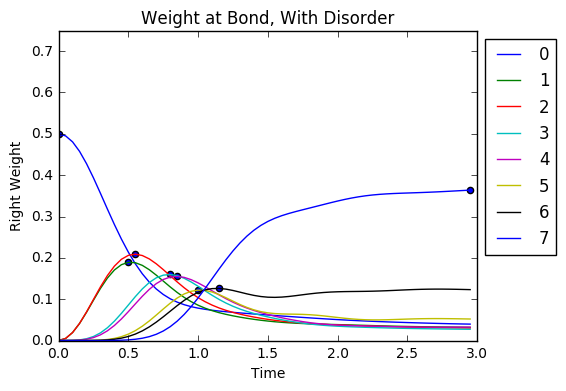

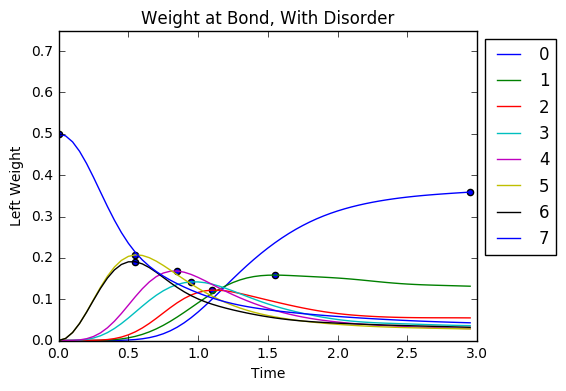

In [127]:
avg_weight, std_weight = qm.mean_and_std(weights)

stop = n*end
peaks = np.zeros((2,L-1))
ax = plt.subplot(111)
for i in range(L-1):
    data = avg_weight[0,i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[0,i] = jdx; break
        if (jdx == 58): peaks[0,i] = 59; break
    peaks[0,0] = 0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i))
        ax.scatter(peaks[0,i]/n, data[(int)(peaks[0,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,3)
plt.ylabel('Right Weight')
plt.xlabel('Time')
plt.title('Weight at Bond, With Disorder')
# plt.savefig('figures/avgRweight.pdf')
plt.show()

ax = plt.subplot(111)
for i in range(L-1):
    data = avg_weight[1,i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[1,i] = jdx; break
        if (jdx == 58): peaks[1,i] = 59; break
    peaks[1,L-2]=0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i))
        ax.scatter(peaks[1,i]/n, data[(int)(peaks[1,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,3)
plt.ylabel('Left Weight')
plt.xlabel('Time')
plt.title('Weight at Bond, With Disorder')
# plt.savefig('figures/plusOTOCwDisorder_back.pdf')
plt.show()

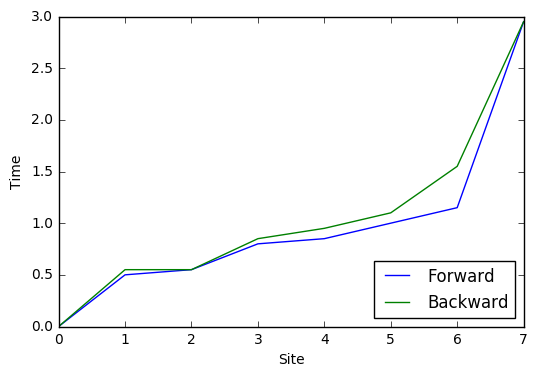

In [129]:
plt.plot(range(L-1),peaks[0]/n, label="Forward")
plt.plot(range(L-1),peaks[1][::-1]/n, label="Backward")
plt.ylabel('Time')
plt.xlabel('Site')
plt.legend(loc=4)
plt.title("Average Weights First")
# plt.savefig('figures/plusPeakssDisorder')
plt.show()

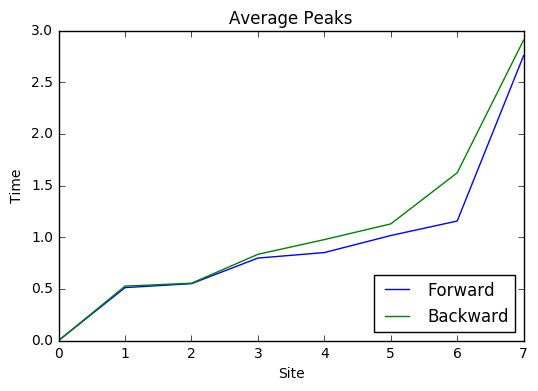

In [131]:
avg_peaks, std_peaks = qm.mean_and_std(peakses)
plt.plot(range(L-1),avg_peaks[0]/n, label="Forward")
plt.plot(range(L-1),avg_peaks[1][::-1]/n, label="Backward")
plt.ylabel('Time')
plt.xlabel('Site')
plt.legend(loc=4)
# plt.savefig('figures/plusPeakssDisorder')
plt.title('Average Peaks')
plt.show()

In [138]:
print(peaks/n)
print(qm.chop(avg_peaks/n))

[[ 0.    0.5   0.55  0.8   0.85  1.    1.15  2.95]
 [ 2.95  1.55  1.1   0.95  0.85  0.55  0.55  0.  ]]
[[ 0.     0.512  0.55   0.798  0.851  1.016  1.156  2.757]
 [ 2.908  1.623  1.128  0.976  0.834  0.554  0.526  0.   ]]


### L=10

In [139]:
L = 10
end = 3
n = 20

here = True
pauli = True
Azero = True
Aplus = False
Amult = False
field_strength = 1
dot_strength = 0

prefix = "data/weights_L"+str(L)+"end"+str(end)+"n"+str(n)+"_"+str(int(here))+ \
         str(int(pauli))+"_"+str(int(Azero))+str(int(Aplus))+str(int(Amult))+ \
         "_f"+str(field_strength)+"d"+str(dot_strength)+"#"
fnames = glob.glob(prefix + "*.npy")

In [140]:
trials = len(fnames)
weights = np.zeros((trials, 2, L-1, end*n))
peakses = np.zeros((trials, 2, L-1))


for idx, fname in enumerate(fnames):
    _, _, weightfore, weightback = np.load(fname)

    for i in range(L-1):
        data = (weightfore[i]+weightfore[i+1])/2
        for jdx, val in enumerate(data):
            if (val > data[jdx+1]): peakses[idx,0,i] = jdx; break
            if (jdx == 58): peakses[idx,0,i] = 59; break
        weights[idx,0,i] = data

    for i in range(L-1):
        data = (weightback[i]+weightback[i+1])/2
        for jdx, val in enumerate(data):
            if (val > data[jdx+1]): 
                peakses[idx,1,i] = jdx
                break
            if (jdx == 58): peakses[idx,1,i] = 59; break
        weights[idx,1,i] = data

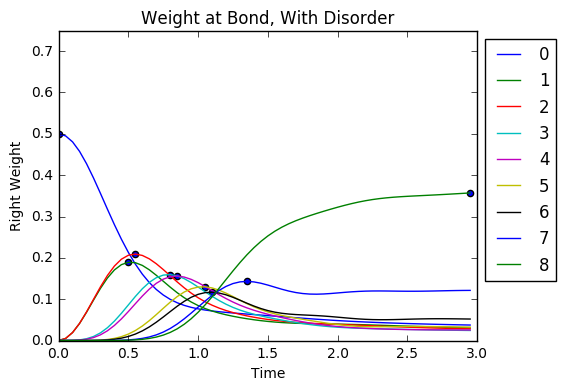

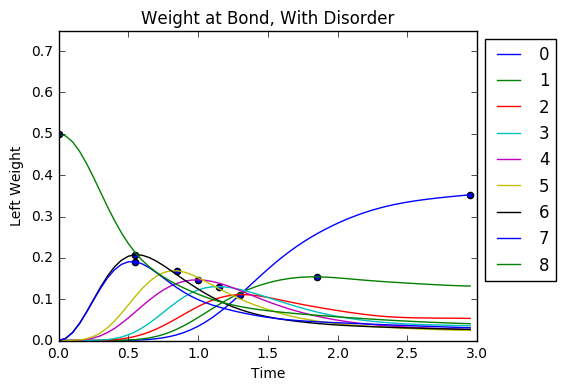

In [141]:
avg_weight, std_weight = qm.mean_and_std(weights)

stop = n*end
peaks = np.zeros((2,L-1))
ax = plt.subplot(111)
for i in range(L-1):
    data = avg_weight[0,i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[0,i] = jdx; break
        if (jdx == 58): peaks[0,i] = 59; break
    peaks[0,0] = 0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i))
        ax.scatter(peaks[0,i]/n, data[(int)(peaks[0,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,3)
plt.ylabel('Right Weight')
plt.xlabel('Time')
plt.title('Weight at Bond, With Disorder')
# plt.savefig('figures/avgRweight.pdf')
plt.show()

ax = plt.subplot(111)
for i in range(L-1):
    data = avg_weight[1,i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[1,i] = jdx; break
        if (jdx == 58): peaks[1,i] = 59; break
    peaks[1,L-2]=0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i))
        ax.scatter(peaks[1,i]/n, data[(int)(peaks[1,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,3)
plt.ylabel('Left Weight')
plt.xlabel('Time')
plt.title('Weight at Bond, With Disorder')
# plt.savefig('figures/plusOTOCwDisorder_back.pdf')
plt.show()

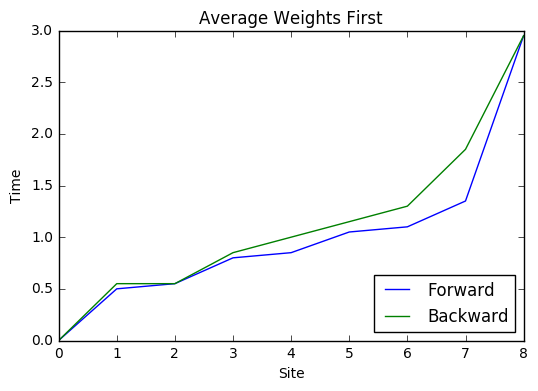

In [142]:
plt.plot(range(L-1),peaks[0]/n, label="Forward")
plt.plot(range(L-1),peaks[1][::-1]/n, label="Backward")
plt.ylabel('Time')
plt.xlabel('Site')
plt.legend(loc=4)
plt.title("Average Weights First")
# plt.savefig('figures/plusPeakssDisorder')
plt.show()

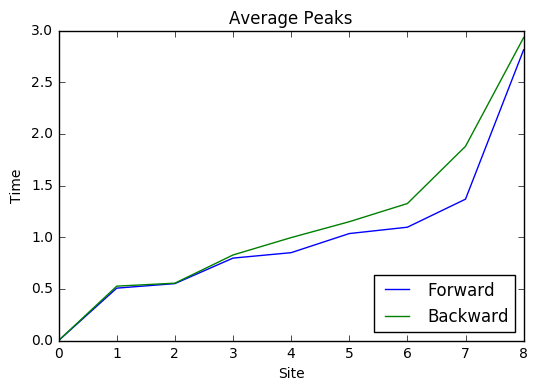

In [143]:
avg_peaks, std_peaks = qm.mean_and_std(peakses)
plt.plot(range(L-1),avg_peaks[0]/n, label="Forward")
plt.plot(range(L-1),avg_peaks[1][::-1]/n, label="Backward")
plt.ylabel('Time')
plt.xlabel('Site')
plt.legend(loc=4)
# plt.savefig('figures/plusPeakssDisorder')
plt.title('Average Peaks')
plt.show()

In [144]:
print(peaks/n)
print(qm.chop(avg_peaks/n))

[[ 0.    0.5   0.55  0.8   0.85  1.05  1.1   1.35  2.95]
 [ 2.95  1.85  1.3   1.15  1.    0.85  0.55  0.55  0.  ]]
[[ 0.     0.507  0.551  0.797  0.85   1.035  1.096  1.368  2.813]
 [ 2.931  1.879  1.326  1.149  0.996  0.828  0.555  0.526  0.   ]]


### L=11

In [166]:
L = 11
end = 3
n = 20

here = True
pauli = True
Azero = True
Aplus = False
Amult = False
field_strength = 1
dot_strength = 0

prefix = "data/weights_L"+str(L)+"end"+str(end)+"n"+str(n)+"_"+str(int(here))+ \
         str(int(pauli))+"_"+str(int(Azero))+str(int(Aplus))+str(int(Amult))+ \
         "_f"+str(field_strength)+"d"+str(dot_strength)+"#"
fnames = glob.glob(prefix + "*.npy")

In [167]:
trials = len(fnames)
weights = np.zeros((trials, 2, L-1, end*n))
peakses = np.zeros((trials, 2, L-1))


for idx, fname in enumerate(fnames):
    _, _, weightfore, weightback = np.load(fname)

    for i in range(L-1):
        data = (weightfore[i]+weightfore[i+1])/2
        for jdx, val in enumerate(data):
            if (val > data[jdx+1]): peakses[idx,0,i] = jdx; break
            if (jdx == 58): peakses[idx,0,i] = 59; break
        weights[idx,0,i] = data

    for i in range(L-1):
        data = (weightback[i]+weightback[i+1])/2
        for jdx, val in enumerate(data):
            if (val > data[jdx+1]): 
                peakses[idx,1,i] = jdx
                break
            if (jdx == 58): peakses[idx,1,i] = 59; break
        weights[idx,1,i] = data

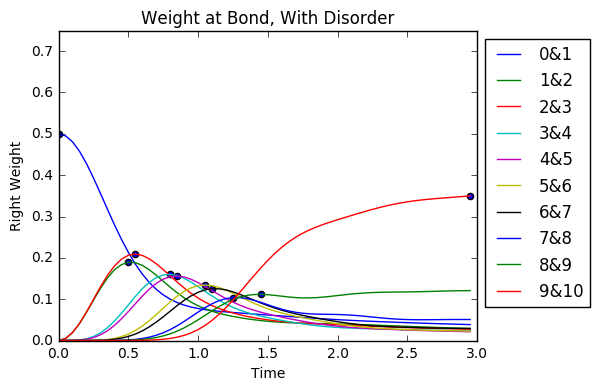

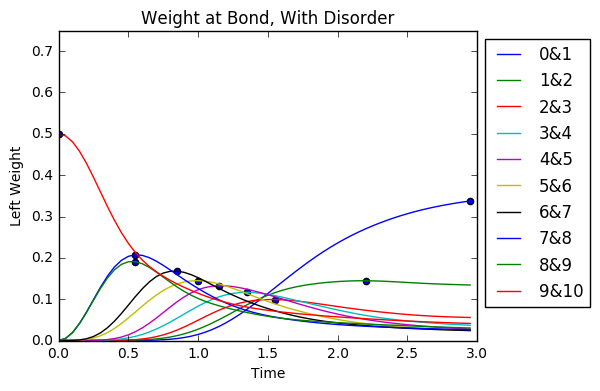

In [168]:
avg_weight, std_weight = qm.mean_and_std(weights)

stop = n*end
peaks = np.zeros((2,L-1))
ax = plt.subplot(111)
for i in range(L-1):
    data = avg_weight[0,i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[0,i] = jdx; break
        if (jdx == 58): peaks[0,i] = 59; break
    peaks[0,0] = 0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i)+'&'+str(i+1))
        ax.scatter(peaks[0,i]/n, data[(int)(peaks[0,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,3)
plt.ylabel('Right Weight')
plt.xlabel('Time')
plt.title('Weight at Bond, With Disorder')
plt.savefig('figures/avgRweightL11.pdf')
plt.show()

ax = plt.subplot(111)
for i in range(L-1):
    data = avg_weight[1,i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[1,i] = jdx; break
        if (jdx == 58): peaks[1,i] = 59; break
    peaks[1,L-2]=0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i)+'&'+str(i+1))
        ax.scatter(peaks[1,i]/n, data[(int)(peaks[1,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,3)
plt.ylabel('Left Weight')
plt.xlabel('Time')
plt.title('Weight at Bond, With Disorder')
plt.savefig('figures/avgLweightL11.pdf')
plt.show()

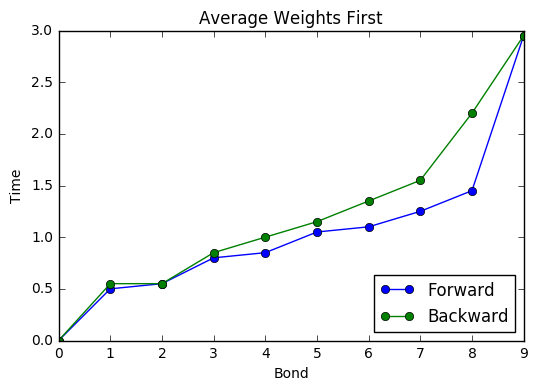

In [169]:
plt.plot(range(L-1),peaks[0]/n, 'o-', label="Forward")
plt.plot(range(L-1),peaks[1][::-1]/n, 'o-', label="Backward")
plt.ylabel('Time')
plt.xlabel('Bond')
plt.legend(loc=4)
plt.title("Average Weights First")
plt.savefig('figures/avgPeaksL11_1.pdf')
plt.show()

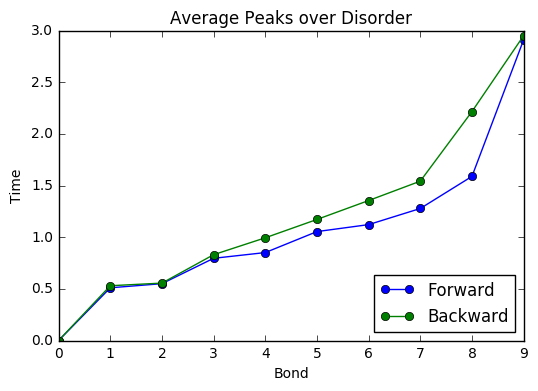

In [170]:
avg_peaks, std_peaks = qm.mean_and_std(peakses)
plt.plot(range(L-1),avg_peaks[0]/n, 'o-', label="Forward")
plt.plot(range(L-1),avg_peaks[1][::-1]/n, 'o-', label="Backward")
plt.ylabel('Time')
plt.xlabel('Bond')
plt.legend(loc=4)
plt.savefig('figures/avgPeaksL11_2.pdf')
plt.title('Average Peaks over Disorder')
plt.show()

In [171]:
print(peaks/n)
print(qm.chop(avg_peaks/n))

[[ 0.    0.5   0.55  0.8   0.85  1.05  1.1   1.25  1.45  2.95]
 [ 2.95  2.2   1.55  1.35  1.15  1.    0.85  0.55  0.55  0.  ]]
[[ 0.     0.51   0.55   0.796  0.851  1.054  1.122  1.278  1.588  2.91 ]
 [ 2.95   2.216  1.542  1.354  1.172  0.994  0.83   0.556  0.53   0.   ]]


### L=13

In [172]:
L = 13
end = 3
n = 20

here = True
pauli = True
Azero = True
Aplus = False
Amult = False
field_strength = 1
dot_strength = 0

prefix = "data/weights_L"+str(L)+"end"+str(end)+"n"+str(n)+"_"+str(int(here))+ \
         str(int(pauli))+"_"+str(int(Azero))+str(int(Aplus))+str(int(Amult))+ \
         "_f"+str(field_strength)+"d"+str(dot_strength)+"#"
fnames = glob.glob(prefix + "*.npy")

In [173]:
trials = len(fnames)
weights = np.zeros((trials, 2, L-1, end*n))
peakses = np.zeros((trials, 2, L-1))


for idx, fname in enumerate(fnames):
    _, _, weightfore, weightback = np.load(fname)

    for i in range(L-1):
        data = (weightfore[i]+weightfore[i+1])/2
        for jdx, val in enumerate(data):
            if (val > data[jdx+1]): peakses[idx,0,i] = jdx; break
            if (jdx == 58): peakses[idx,0,i] = 59; break
        weights[idx,0,i] = data

    for i in range(L-1):
        data = (weightback[i]+weightback[i+1])/2
        for jdx, val in enumerate(data):
            if (val > data[jdx+1]): 
                peakses[idx,1,i] = jdx
                break
            if (jdx == 58): peakses[idx,1,i] = 59; break
        weights[idx,1,i] = data

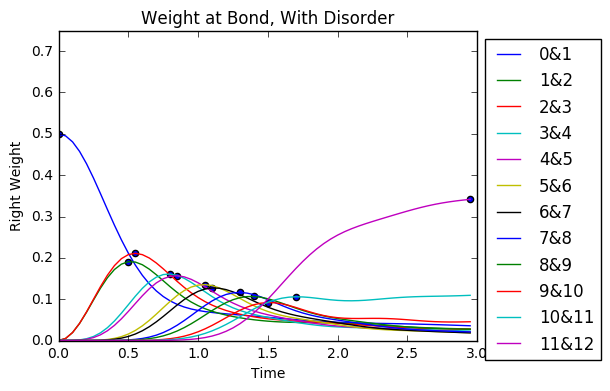

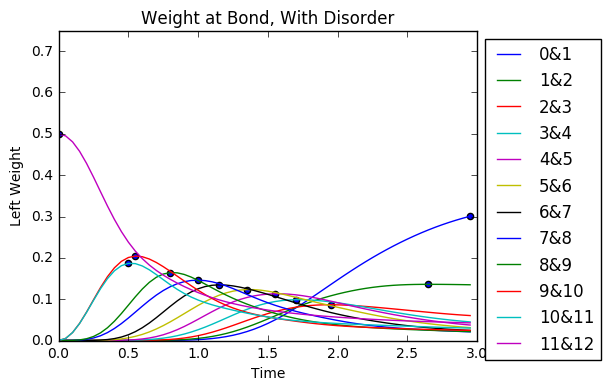

In [174]:
avg_weight, std_weight = qm.mean_and_std(weights)

stop = n*end
peaks = np.zeros((2,L-1))
ax = plt.subplot(111)
for i in range(L-1):
    data = avg_weight[0,i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[0,i] = jdx; break
        if (jdx == 58): peaks[0,i] = 59; break
    peaks[0,0] = 0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i)+'&'+str(i+1))
        ax.scatter(peaks[0,i]/n, data[(int)(peaks[0,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,3)
plt.ylabel('Right Weight')
plt.xlabel('Time')
plt.title('Weight at Bond, With Disorder')
plt.savefig('figures/avgRweightL13.pdf')
plt.show()

ax = plt.subplot(111)
for i in range(L-1):
    data = avg_weight[1,i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[1,i] = jdx; break
        if (jdx == 58): peaks[1,i] = 59; break
    peaks[1,L-2]=0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i)+'&'+str(i+1))
        ax.scatter(peaks[1,i]/n, data[(int)(peaks[1,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,3)
plt.ylabel('Left Weight')
plt.xlabel('Time')
plt.title('Weight at Bond, With Disorder')
plt.savefig('figures/avgLweightL13.pdf')
plt.show()

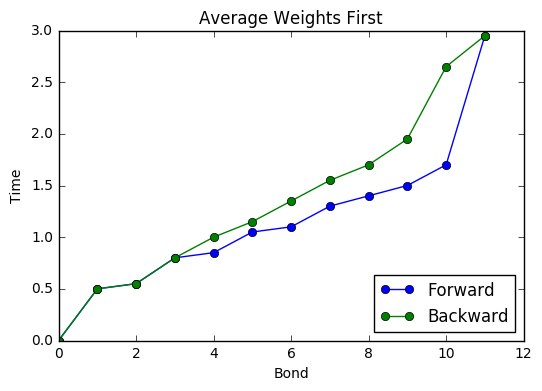

In [175]:
plt.plot(range(L-1),peaks[0]/n, 'o-', label="Forward")
plt.plot(range(L-1),peaks[1][::-1]/n, 'o-', label="Backward")
plt.ylabel('Time')
plt.xlabel('Bond')
plt.legend(loc=4)
plt.title("Average Weights First")
plt.savefig('figures/avgPeaksL13_1.pdf')
plt.show()

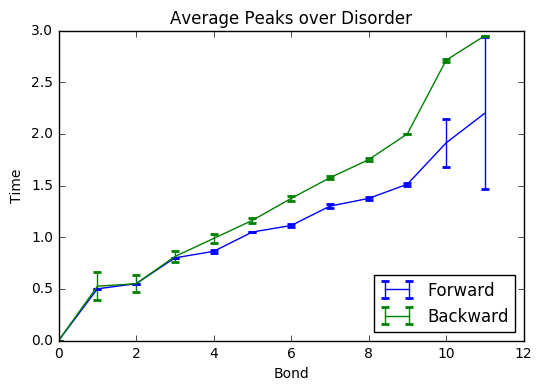

In [186]:
avg_peaks, std_peaks = qm.mean_and_std(peakses)
plt.errorbar(range(L-1),avg_peaks[0]/n, yerr=std_peaks[0]/n, capthick=2, label="Forward")
plt.errorbar(range(L-1),avg_peaks[1][::-1]/n, yerr=std_peaks[1]/n, capthick=2, label="Backward")
plt.ylabel('Time')
plt.xlabel('Bond')
plt.legend(loc=4)
plt.savefig('figures/avgPeaksL13_2.pdf')
plt.title('Average Peaks over Disorder')
plt.show()

In [177]:
print(peaks/n)
print(qm.chop(avg_peaks/n))

[[ 0.    0.5   0.55  0.8   0.85  1.05  1.1   1.3   1.4   1.5   1.7   2.95]
 [ 2.95  2.65  1.95  1.7   1.55  1.35  1.15  1.    0.8   0.55  0.5   0.  ]]
[[ 0.     0.5    0.55   0.8    0.862  1.05   1.112  1.3    1.375  1.512
   1.912  2.2  ]
 [ 2.95   2.712  2.     1.75   1.575  1.375  1.162  0.988  0.812  0.55
   0.525  0.   ]]
